<a href="https://colab.research.google.com/github/hannahscha/cheg472/blob/main/CHEG_472_Week_2_workshop_data_preprocessing_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
file_name = "Dataset Clean.xlsx" # Replace with our actual file name
df = pd.read_excel(file_name)

# Display the first few rows of the dataset
df.head()




Saving Dataset Clean.xlsx to Dataset Clean (3).xlsx


,Number,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,1.0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,NaN,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,NaN,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,NaN,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,NaN,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


Step 2

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()

# Display columns with missing data
missing_data[missing_data > 0]

,0
Number,50
Biomass,1


In [ ]:

# Dropping rows with missing data
df_cleaned = df.dropna()

# Example of imputing missing values with the mean
df['PS'].fillna(df['PS'].mean(), inplace=True)
df['PV'].fillna(df['PV'].mean(), inplace=True)
df['C'].fillna(df['C'].mean(), inplace=True)
df['H'].fillna(df['H'].mean(), inplace=True)
df['O'].fillna(df['O'].mean(), inplace=True)

# Convert 'N' column to numeric type before filling missing values - From gemini
df['N'] = pd.to_numeric(df['N'], errors='coerce') #The errors='coerce' argument handles invalid values by converting them to NaN.
df['N'].fillna(df['N'].mean(), inplace=True)

df['O'].fillna(df['O'].mean(), inplace=True)

Step 3

In [ ]:
# Print the dataset's columns
print(df.columns)

# Check the data types to identify numeric columns
df.dtypes

Index(['TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N', 'O',
       'Qm (mg/g)'],
      dtype='object')


,0
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64
N,float64
O,float64
Qm (mg/g),float64


In [ ]:
# Replace 'your_column' with the actual column name that needs conversion

# Remove commas and convert to float, handling non-numeric values
# from gemini
df['your_column'] = pd.to_numeric(df['your_column'].str.replace(',', ''), errors='coerce') # from gemini

# Remove the first column of the dataset
df = df.iloc[:,1:]

# Display the first few rows to confirm the column is removed
df.head()

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Print the dataset's columns
print(df.columns)

# Check the data types to identify numeric column
df.dtypes

Index(['TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N', 'O',
       'Qm (mg/g)'],
      dtype='object')


,0
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64
N,float64
O,float64
Qm (mg/g),float64


Step 4

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display categorical columns
categorical_columns

Index([], dtype='object')

Step 5

In [ ]:
# Apply one-how encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,NaN
1,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,NaN
2,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,NaN
3,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,NaN
4,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,NaN


Step 6

In [ ]:
# Assuming 'target_column' is the name of your target variable
X = df_encoded.drop('TemP' , axis=1)
y = df_encoded['TemP']

#Display the first few rows of x and y
X.head(), y.head()

(   Time (min)    PS     BET    PV      C     H     N      O  Qm (mg/g)
 0       150.0  9.82    3.43  0.02  30.84  2.14  0.43  20.32        NaN
 1        10.0  1.37   94.39  0.06  30.69  0.96  0.32  20.41        NaN
 2        10.0  1.37  120.86  0.08  28.81  0.47  0.33  19.29        NaN
 3       150.0  1.41  209.12  0.13  27.05  0.82  0.33   9.73        NaN
 4        10.0  3.69   10.82  0.02  35.35  0.72  2.47   2.01        NaN,
 0    315
 1    600
 2    800
 3    800
 4    800
 Name: TemP, dtype: int64)

Step 7

In [ ]:
# Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

             TemP  Time (min)          PS          BET         PV          C  \
count   86.000000   86.000000   86.000000    86.000000  86.000000  86.000000   
mean   566.453488  151.347287   13.908847   191.444442   0.152331  57.293855   
std    170.921148  126.607738   38.729014   298.769825   0.179817  20.035848   
min    300.000000    0.100000    1.320000     0.479000   0.001000   9.460000   
25%    450.000000   60.000000    2.910000     7.100000   0.020000  42.192500   
50%    500.000000  120.000000    4.440000    59.090000   0.100000  58.660000   
75%    700.000000  150.000000    9.865000   295.500000   0.223750  73.732500   
max    950.000000  480.000000  213.290000  1838.860000   1.030000  89.570000   

               H          N          O  Qm (mg/g)  
count  86.000000  86.000000  86.000000        0.0  
mean    1.927890   1.930759  16.469048        NaN  
std     1.609467   2.410117  10.828736        NaN  
min     0.000000   0.000000   0.670000        NaN  
25%     0.860000   

In [ ]:
# Assuming df_encoded is your dataset after one=hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
[]


In [ ]:
#Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding. just use df

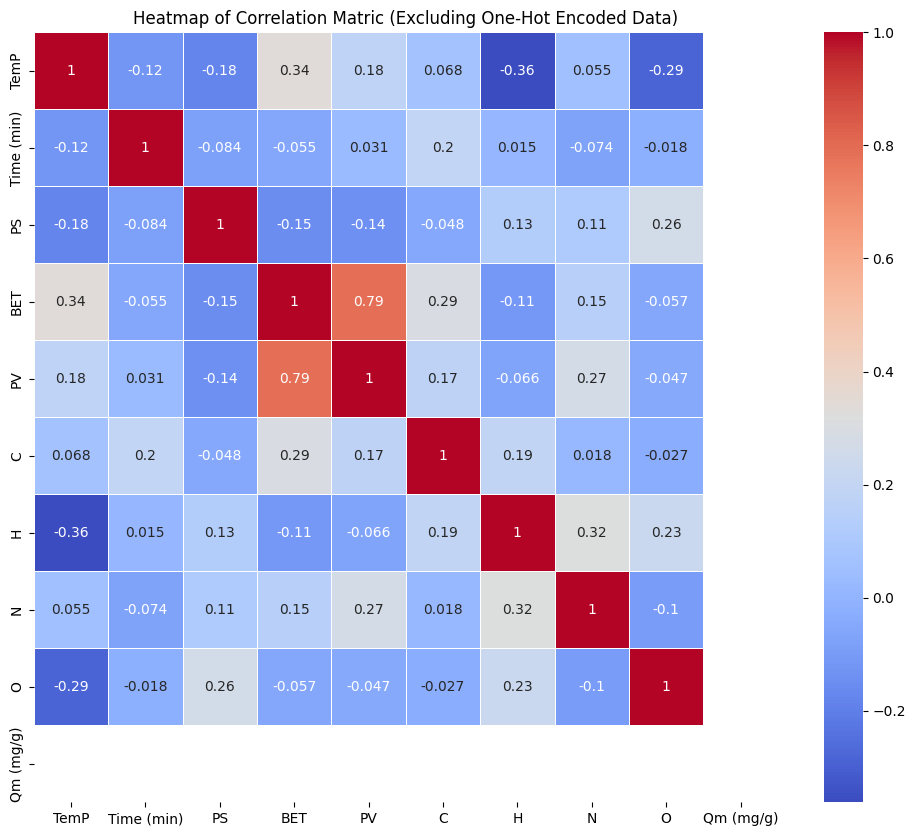

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matric (Excluding One-Hot Encoded Data)')
plt.show()

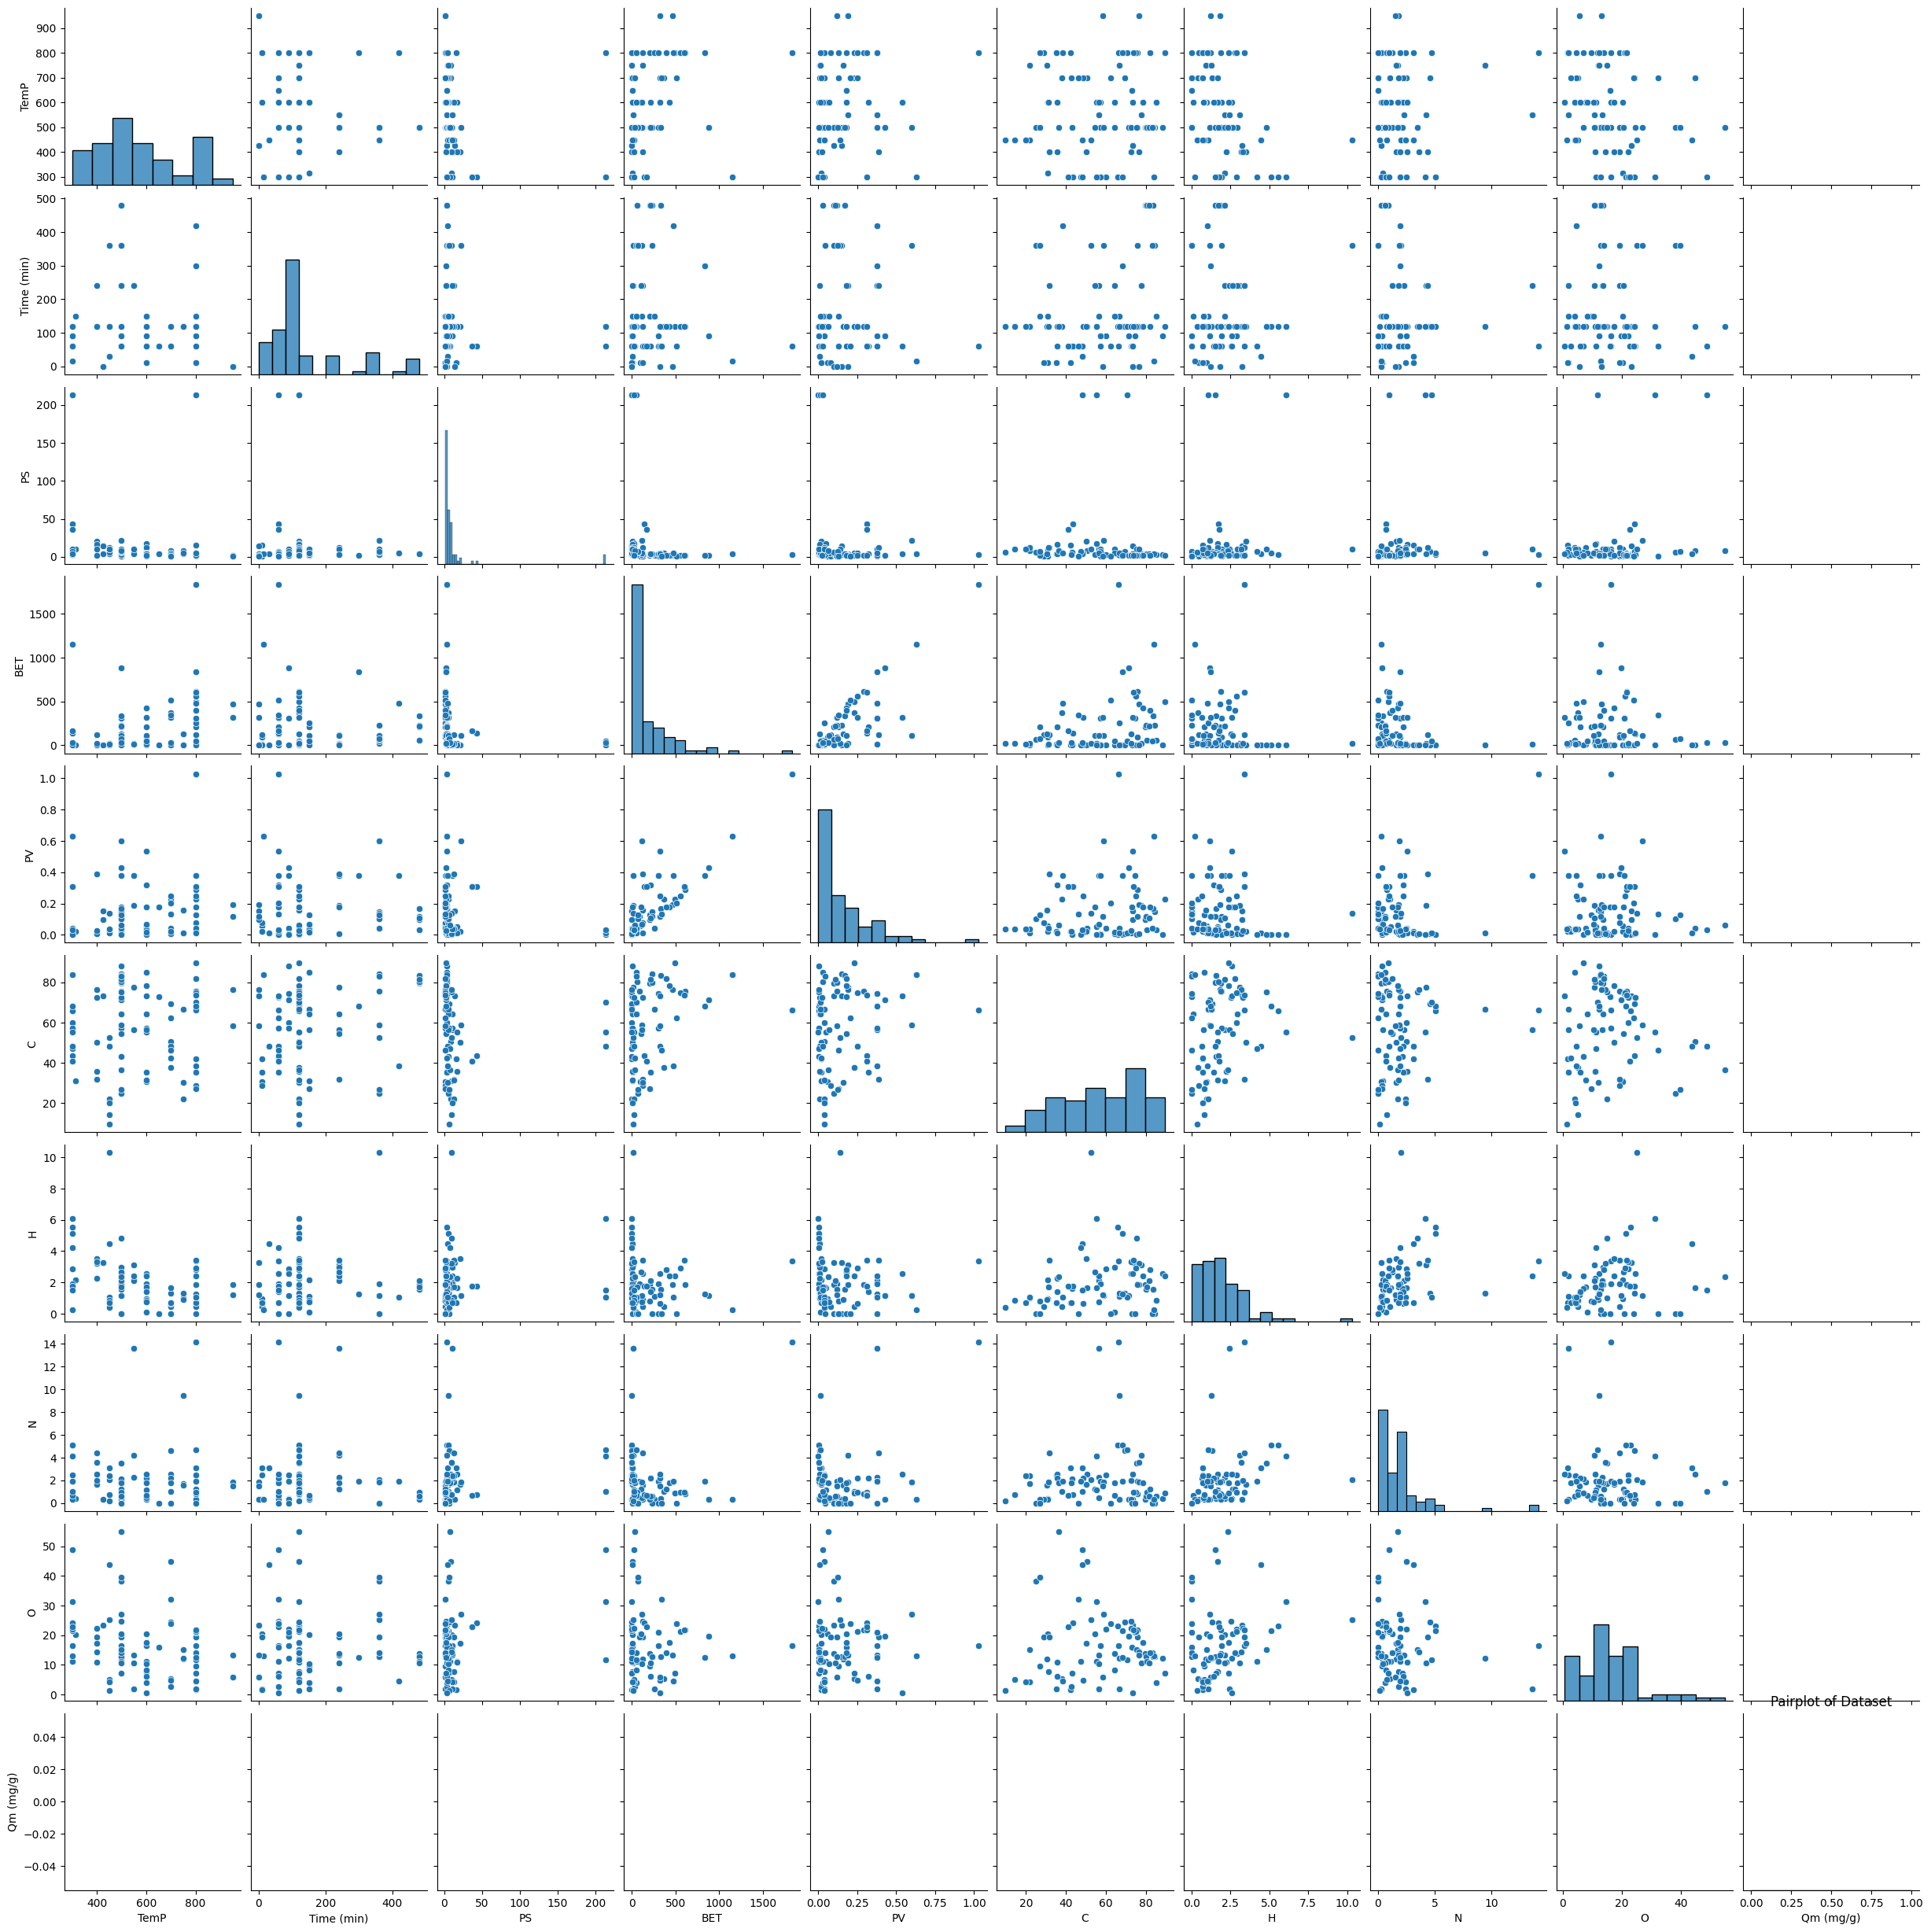

In [ ]:
#Plot a pariplot to visualize relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()

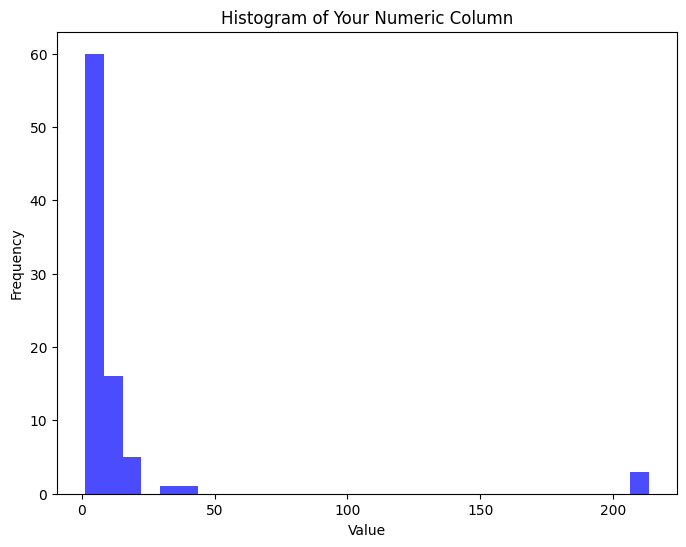

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram for a specific numeric column
# Change 'your_numeric_column' to the name of the column you wish to plot histogram for
plt.figure(figsize=(8, 6))
plt.hist(df['PS'], bins=30, alpha= 0.7, color= 'blue')
plt.title('Histogram of Your Numeric Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

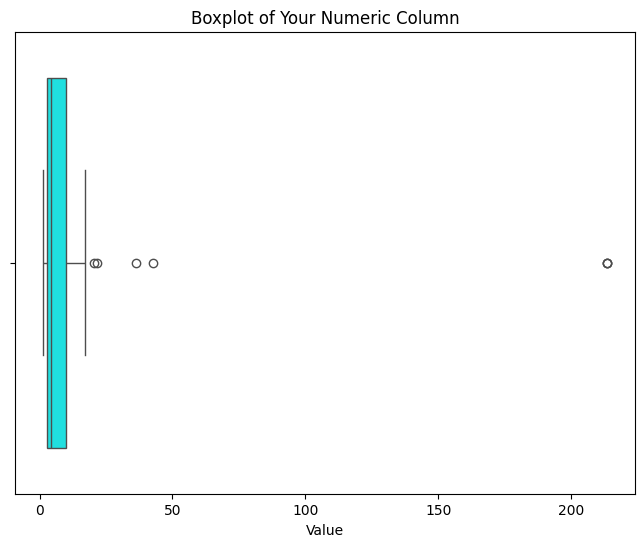

In [ ]:
import seaborn as sns

# Plotting a boxplot for a specific numeric column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['PS'], color='cyan')
plt.title('Boxplot of Your Numeric Column')
plt.xlabel('Value')
plt.show()

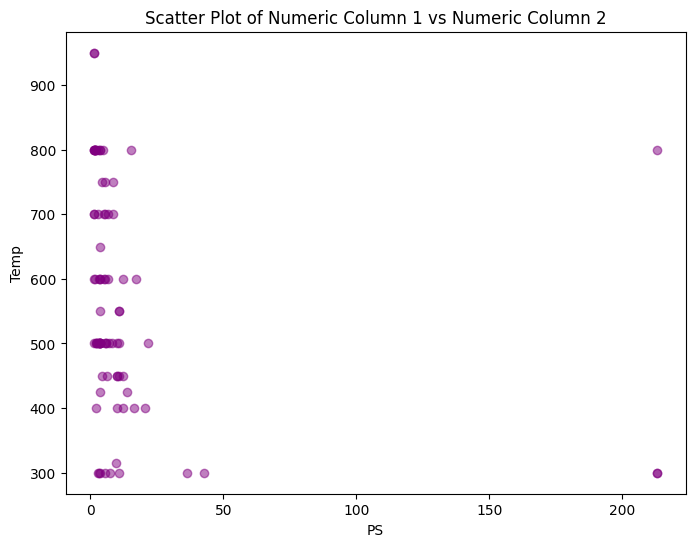

In [ ]:
# Plotting a scatter plot for two numeric columns
plt.figure(figsize=(8, 6))
plt.scatter(df['PS'], df['TemP'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Numeric Column 1 vs Numeric Column 2')
plt.xlabel('PS')
plt.ylabel('Temp')
plt.show()

<ipython-input-74-76304f586156>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TemP', y='PS', data=df, palette='muted')


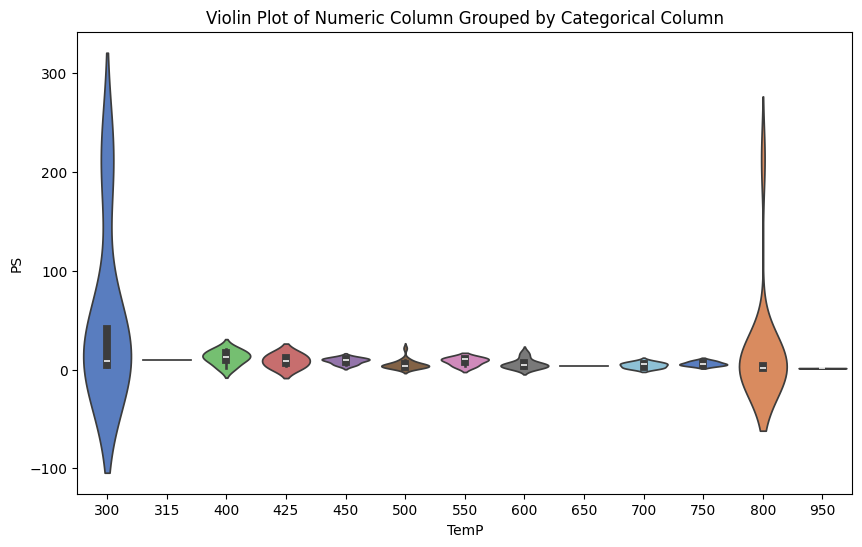

In [ ]:
# Plotting a violin plot for a specific numeric column grouped by a categorical column
plt.figure(figsize=(10, 6))
sns.violinplot(x='TemP', y='PS', data=df, palette='muted')
plt.title('Violin Plot of Numeric Column Grouped by Categorical Column')
plt.xlabel('TemP')
plt.ylabel('PS')
plt.show()